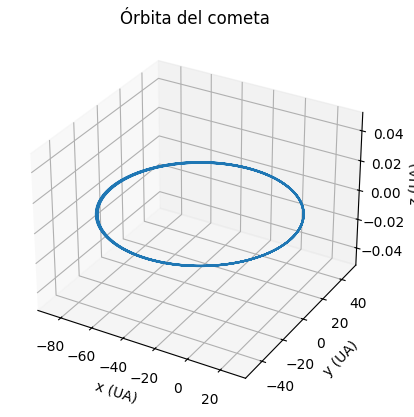

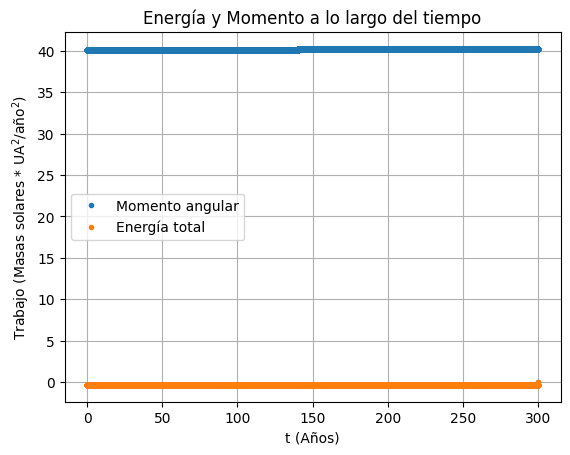

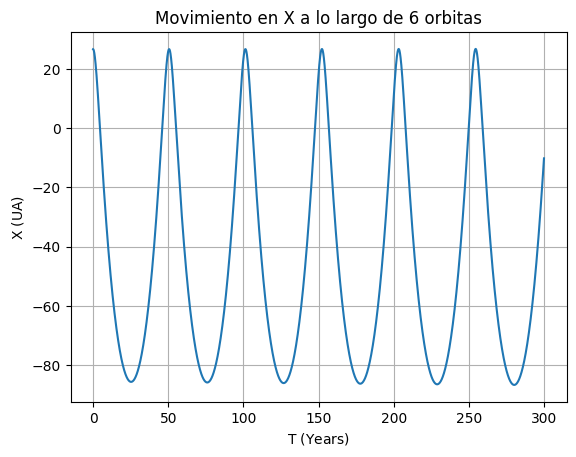

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time, TimeDelta
from mpl_toolkits.mplot3d import Axes3D

G=4*np.pi**2 #en UA^3 / (M_solar * año^2)
M=1 #Masas Solares

#Definicion de los valores iniciales y los tamaños de las listas a llenar
N=250000
x=np.zeros(N)
y=np.zeros(N)
z=np.zeros(N)
v_x=np.zeros(N)
v_y=np.zeros(N)
v_z=np.zeros(N)
a_x=np.zeros(N)
a_y=np.zeros(N)
a_z=np.zeros(N)
r=np.zeros(N)
E=np.zeros(N)
L=np.zeros(N)

x[0]=26.74
y[0]=0 
z[0]=0 
v_x[0]=0
v_y[0]=1.5
v_z[0]=0
dt=0.01
t=np.linspace(0,300,N)

def Ax(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    ax=-G*M*x/r**3
    return ax
def Ay(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    ay=-G*M*y/r**3
    return ay
def Az(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    az=-G*M*z/r**3
    return az

def RK4x (dt):
    L_x=np.zeros(N)
    L_y=np.zeros(N)
    L_z=np.zeros(N)
    for i in range (len(x)-1):
        k1v=dt*Ax(x[i],y[i],z[i])
        k1r= dt*v_x[i]
        k2v=dt*Ax(x[i]+k1r/2,y[i],z[i])
        k2r=dt*(v_x[i]+k1v/2)
        k3v=dt*Ax(x[i]+k2r/2,y[i],z[i])
        k3r=dt*(v_x[i]+k2v/2)
        k4v=dt*Ax(x[i]+k3r,y[i],z[i])
        k4r=dt*(v_x[i]+k3v)

        x[i+1]=x[i]+(k1r + 2*k2r + 2*k3r + k4r) / 6
        v_x[i+1]=v_x[i]+(k1v + 2*k2v + 2*k3v + k4v) / 6

        k1vy=dt*Ay(x[i],y[i],z[i])
        k1ry=dt*v_y[i]
        
        k2vy=dt*Ay(x[i],y[i]+k1ry/2,z[i])
        k2ry=dt*(v_y[i]+k1vy/2)
        
        k3vy=dt*Ay(x[i],y[i]+k2ry/2,z[i])
        k3ry=dt*(v_y[i]+k2vy/2)
        
        k4vy=dt*Ay(x[i],y[i]+k3ry,z[i])
        k4ry=dt*(v_y[i]+k3vy)

        y[i+1]=y[i]+(k1ry+2*k2ry+2*k3ry +k4ry)/6
        v_y[i+1]=v_y[i]+(k1vy+2*k2vy+2*k3vy+k4vy)/6


        k1vz=dt*Az(x[i],y[i],z[i])
        k1rz=dt*v_z[i]
        
        k2vz=dt*Az(x[i],y[i],z[i]+k1rz/2)
        k2rz=dt*(v_z[i]+k1vz/2)
        
        k3vz=dt*Az(x[i],y[i],z[i]+k2rz/2)
        k3rz=dt*(v_z[i]+k2vz/2)
        
        k4vz=dt*Az(x[i],y[i],z[i]+k3rz)
        k4rz=dt*(v_z[i]+k3vz)

        z[i+1]=z[i]+(k1rz+2*k2rz+2*k3rz+k4rz)/6
        v_z[i+1]=v_z[i]+(k1vz+2*k2vz+2*k3vz+k4vz)/6
        
        E[i]=((v_x[i]**2+v_y[i]**2+v_z[i]**2)/(2*M))-(G*M/np.sqrt(x[i]**2+y[i]**2+z[i]**2))
        L_x[i]=y[i]*v_z[i]-z[i]*v_y[i]
        L_y[i]=z[i]*v_x[i]-x[i]*v_z[i]
        L_z[i]=x[i]*v_y[i]-y[i]*v_x[i]
        L[i]=np.sqrt(L_x[i]**2+L_y[i]**2+L_z[i]**2)


    return x,y,z,E,L




      
        

RK4x(dt) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title("Órbita del cometa")
ax.set_xlabel("x (UA)")
ax.set_ylabel("y (UA)")
ax.set_zlabel("z (UA)")
plt.show()

plt.plot(t,L,'.', label='Momento angular')
plt.plot(t,E,'.', label='Energía total')
plt.title('Energía y Momento a lo largo del tiempo')
plt.xlabel('t (Años)')
plt.ylabel(r'Trabajo (Masas solares * $\mathrm{UA^2}/\mathrm{año^2}$)')
plt.grid()
plt.legend()
plt.figure()

plt.plot(t,x)
plt.title('Movimiento en X a lo largo de 6 orbitas')
plt.xlabel(r'T ($\mathrm{Years}$)')
plt.ylabel(r'X ($\mathrm{UA}$)')
plt.plot()
plt.grid()


 





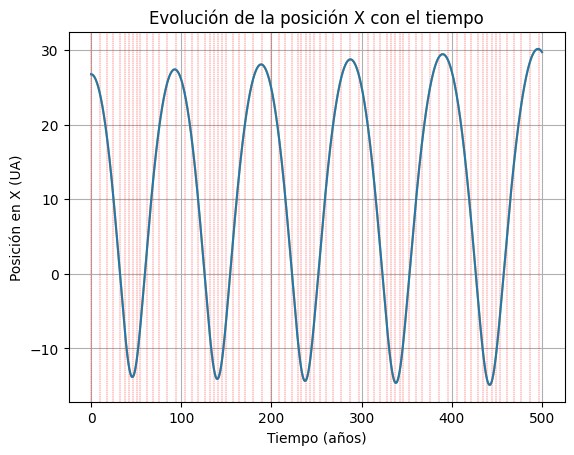

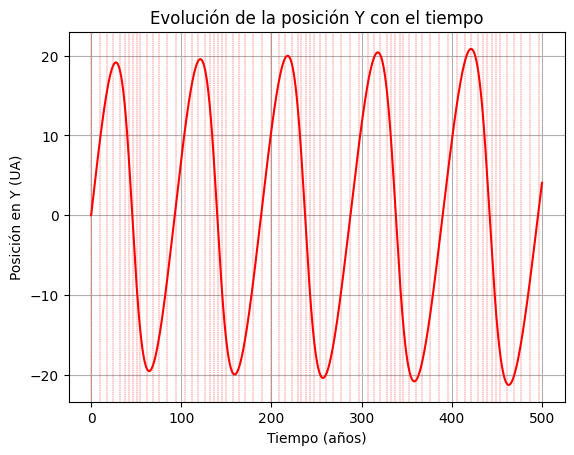

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 4 * np.pi**2  # UA^3 / (M_solar * año^2)
M = 1  # Masas Solares

#Condiciones iniciales
x_1=[26.74]
y_1=[0]
z_1=[0]
v_x_1=[0]
v_y_1=[1]
v_z_1=[0]
t_1=[0]
t_total = 500


def Ax(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    return -G*M*x/r**3

def Ay(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    return -G*M*y/r**3

def Az(x,y,z):
    r=np.sqrt(x**2+y**2+z**2)
    return -G*M*z/r**3


def RK4(x, v_x, y, v_y, z, v_z, dt):
    
    k1v=dt*Ax(x, y, z)
    k1r=dt*v_x
    k2v=dt*Ax(x+k1r/2,y,z)
    k2r=dt*(v_x+k1v/2)
    k3v=dt*Ax(x+k2r/2,y,z)
    k3r=dt*(v_x+k2v/2)
    k4v=dt*Ax(x+k3r,y,z)
    k4r=dt*(v_x+k3v)
    x_new=x+(k1r+2*k2r+2*k3r+k4r)/6
    v_x_new=v_x+(k1v+2*k2v+2*k3v+k4v)/6

    
    k1vy=dt*Ay(x,y,z)
    k1ry=dt*v_y
    k2vy=dt*Ay(x,y+k1ry/2,z)
    k2ry=dt*(v_y+k1vy/2)
    k3vy=dt*Ay(x,y+k2ry/2,z)
    k3ry=dt*(v_y+k2vy/2)
    k4vy=dt*Ay(x,y+k3ry,z)
    k4ry=dt*(v_y+k3vy)
    y_new=y+(k1ry+2*k2ry+2*k3ry+k4ry)/6
    v_y_new=v_y+(k1vy+2*k2vy+2*k3vy+k4vy)/6

    
    k1vz=dt*Az(x,y,z)
    k1rz=dt*v_z
    k2vz=dt*Az(x,y,z+k1rz/2)
    k2rz=dt*(v_z+k1vz/2)
    k3vz=dt*Az(x,y,z+k2rz/2)
    k3rz=dt*(v_z+k2vz/2)
    k4vz=dt*Az(x,y,z+k3rz)
    k4rz=dt*(v_z+k3vz)
    z_new=z+(k1rz+2*k2rz+2*k3rz+k4rz)/6
    v_z_new=v_z+(k1vz+2*k2vz+2*k3vz+k4vz)/6

    return x_new, v_x_new, y_new, v_y_new, z_new, v_z_new


def Error(a, b):
    return abs(a - b)

# Integración con paso adaptativo
def P_Adap(x, v_x, y, v_y, z, v_z, dt, tol):
    x1, vx1, y1, vy1, z1, vz1=RK4(x, v_x, y, v_y, z, v_z, dt)
    x_half1, vx_half1, y_half1, vy_half1, z_half1, vz_half1=RK4(x, v_x, y, v_y, z, v_z, dt / 2)
    x_half2, vx_half2, y_half2, vy_half2, z_half2, vz_half2=RK4(x_half1, vx_half1, y_half1, vy_half1, z_half1, vz_half1, dt / 2)

    errorx=max(Error(x1, x_half2), 1e-16)
    errory=max(Error(y1, y_half2), 1e-16)
    errorz=max(Error(z1, z_half2), 1e-16)

    dtx=dt*(tol / errorx)**(1/5)
    dty=dt*(tol / errory)**(1/5)
    dtz=dt*(tol / errorz)**(1/5)

    dtelegido=min(dtx, dty, dtz)
    dt_min, dt_max=1e-8, 0.1
    dtelegido=max(min(dtelegido, dt_max), dt_min)

    # Aceptar el paso solo si todos los errores son aceptables
    if errorx < tol and errory < tol and errorz < tol:
        x_1.append(x1)
        y_1.append(y1)
        z_1.append(z1)
        v_x_1.append(vx1)
        v_y_1.append(vy1)
        v_z_1.append(vz1)
        t_1.append(t_1[-1] + dtelegido)

        x, y, z=x1, y1, z1
        v_x, v_y, v_z=vx1, vy1, vz1

    return x, v_x, y, v_y, z, v_z, dtelegido

x, y, z=x_1[-1], y_1[-1], z_1[-1]
v_x, v_y, v_z=v_x_1[-1], v_y_1[-1], v_z_1[-1]
t=t_1[-1]
dt=0.001
tol=1e-7


while t < t_total:
    x, v_x, y, v_y, z, v_z, dt=P_Adap(x, v_x, y, v_y, z, v_z, dt, tol)
    t=t_1[-1] 
  


plt.figure()
plt.plot(t_1, x_1, color='orange', label='x(t)')


for i in range(0, len(t_1), 100):
    plt.axvline(x=t_1[i], color='red', linestyle='--', linewidth=0.3)
plt.plot(t_1, x_1)
plt.xlabel('Tiempo (años)')
plt.ylabel('Posición en X (UA)')
plt.title('Evolución de la posición X con el tiempo')
plt.grid(True)
plt.show()

plt.figure()
for i in range(0, len(t_1), 100):
    plt.axvline(x=t_1[i], color='red', linestyle='--', linewidth=0.3)
plt.plot(t_1, y_1,'red')
plt.xlabel('Tiempo (años)')
plt.ylabel('Posición en Y (UA)')
plt.title('Evolución de la posición Y con el tiempo')
plt.grid(True)
plt.show()